In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pprint
from copy import deepcopy
from sklearn.metrics import confusion_matrix #ONLY USED FOR PLOTTING NOT EVALUATION
import random
import json

## **Loading and Cleaning Data**

**Loading the dataset**

In [ ]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data = data.sample(frac=1).reset_index(drop=True)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53931,915.794,364.579544,189.297004,1.925966,0.854641,54651,262.044046,0.647400,0.986825,0.808077,0.718757,0.006760,0.001113,0.516611,0.994976,HOROZ
1,31746,669.002,242.502507,167.580320,1.447082,0.722811,32134,201.047911,0.696765,0.987926,0.891341,0.829055,0.007639,0.002226,0.687332,0.994626,DERMASON
2,63206,1035.302,416.580206,194.290238,2.144113,0.884577,64172,283.683589,0.692638,0.984947,0.741027,0.680982,0.006591,0.000874,0.463736,0.994303,HOROZ
3,38134,717.612,247.751869,196.271832,1.262289,0.610247,38522,220.349079,0.778404,0.989928,0.930557,0.889394,0.006497,0.002508,0.791022,0.998499,SEKER
4,54471,915.945,378.793963,183.501841,2.064252,0.874826,54914,263.352675,0.806655,0.991933,0.815899,0.695240,0.006954,0.001002,0.483359,0.997774,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,39078,734.170,280.680490,178.028368,1.576605,0.773108,39474,223.059756,0.780935,0.989968,0.911064,0.794711,0.007183,0.001767,0.631565,0.995729,DERMASON
13607,60239,966.280,394.180245,195.988834,2.011238,0.867632,60865,276.945260,0.623779,0.989715,0.810740,0.702585,0.006544,0.000984,0.493626,0.992800,HOROZ
13608,50724,849.547,316.374029,205.189204,1.541865,0.761159,51283,254.133435,0.694488,0.989100,0.883179,0.803269,0.006237,0.001602,0.645241,0.994874,SIRA
13609,54306,926.309,374.438736,191.626421,1.954004,0.859123,56858,262.953507,0.776110,0.955116,0.795327,0.702260,0.006895,0.001034,0.493170,0.963655,HOROZ


**Checking For Null or Missing Values**

In [ ]:
# checking in case of missing or null values

for col in data.columns.to_list():
  print(data[col].isna().sum(),'\n\n')

0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 


0 




**Checking For Duplicate Rows**

In [ ]:
data.duplicated().sum() # none

68

**Dropping Duplicate Rows**

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True,drop=True)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53931,915.794,364.579544,189.297004,1.925966,0.854641,54651,262.044046,0.647400,0.986825,0.808077,0.718757,0.006760,0.001113,0.516611,0.994976,HOROZ
1,31746,669.002,242.502507,167.580320,1.447082,0.722811,32134,201.047911,0.696765,0.987926,0.891341,0.829055,0.007639,0.002226,0.687332,0.994626,DERMASON
2,63206,1035.302,416.580206,194.290238,2.144113,0.884577,64172,283.683589,0.692638,0.984947,0.741027,0.680982,0.006591,0.000874,0.463736,0.994303,HOROZ
3,38134,717.612,247.751869,196.271832,1.262289,0.610247,38522,220.349079,0.778404,0.989928,0.930557,0.889394,0.006497,0.002508,0.791022,0.998499,SEKER
4,54471,915.945,378.793963,183.501841,2.064252,0.874826,54914,263.352675,0.806655,0.991933,0.815899,0.695240,0.006954,0.001002,0.483359,0.997774,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,39078,734.170,280.680490,178.028368,1.576605,0.773108,39474,223.059756,0.780935,0.989968,0.911064,0.794711,0.007183,0.001767,0.631565,0.995729,DERMASON
13539,60239,966.280,394.180245,195.988834,2.011238,0.867632,60865,276.945260,0.623779,0.989715,0.810740,0.702585,0.006544,0.000984,0.493626,0.992800,HOROZ
13540,50724,849.547,316.374029,205.189204,1.541865,0.761159,51283,254.133435,0.694488,0.989100,0.883179,0.803269,0.006237,0.001602,0.645241,0.994874,SIRA
13541,54306,926.309,374.438736,191.626421,1.954004,0.859123,56858,262.953507,0.776110,0.955116,0.795327,0.702260,0.006895,0.001034,0.493170,0.963655,HOROZ


**Checking Data Types For Each Columnn**

In [ ]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

**Encoding Target Variable**

In [ ]:
# Assigning a temporary number to each label
encodings = {'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6}

In [ ]:
def encode_target(s):
  return encodings[s]

data['Class'] = data['Class'].apply(encode_target)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,53931,915.794,364.579544,189.297004,1.925966,0.854641,54651,262.044046,0.647400,0.986825,0.808077,0.718757,0.006760,0.001113,0.516611,0.994976,3
1,31746,669.002,242.502507,167.580320,1.447082,0.722811,32134,201.047911,0.696765,0.987926,0.891341,0.829055,0.007639,0.002226,0.687332,0.994626,0
2,63206,1035.302,416.580206,194.290238,2.144113,0.884577,64172,283.683589,0.692638,0.984947,0.741027,0.680982,0.006591,0.000874,0.463736,0.994303,3
3,38134,717.612,247.751869,196.271832,1.262289,0.610247,38522,220.349079,0.778404,0.989928,0.930557,0.889394,0.006497,0.002508,0.791022,0.998499,2
4,54471,915.945,378.793963,183.501841,2.064252,0.874826,54914,263.352675,0.806655,0.991933,0.815899,0.695240,0.006954,0.001002,0.483359,0.997774,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,39078,734.170,280.680490,178.028368,1.576605,0.773108,39474,223.059756,0.780935,0.989968,0.911064,0.794711,0.007183,0.001767,0.631565,0.995729,0
13539,60239,966.280,394.180245,195.988834,2.011238,0.867632,60865,276.945260,0.623779,0.989715,0.810740,0.702585,0.006544,0.000984,0.493626,0.992800,3
13540,50724,849.547,316.374029,205.189204,1.541865,0.761159,51283,254.133435,0.694488,0.989100,0.883179,0.803269,0.006237,0.001602,0.645241,0.994874,1
13541,54306,926.309,374.438736,191.626421,1.954004,0.859123,56858,262.953507,0.776110,0.955116,0.795327,0.702260,0.006895,0.001034,0.493170,0.963655,3


## **Normalization Function**

**Min-Max Normalization**

In [ ]:
def min_max_normalize(df):
  features = df.columns.to_list()[0:-1]
  for col in features:
    df[col] = ( ( df[col] - min(df[col]) ) / ( max(df[col]) - min(df[col]) ) )
  return df.copy()  

In [ ]:
data = min_max_normalize(data)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.143090,0.267732,0.325935,0.197771,0.641151,0.918000,0.140026,0.246980,0.296208,0.895905,0.635561,0.225481,0.518965,0.176969,0.188284,0.908605,3
1,0.048361,0.098769,0.106079,0.133460,0.300415,0.727625,0.047202,0.097528,0.454999,0.910489,0.801735,0.543594,0.633484,0.535961,0.490750,0.901886,0
2,0.182693,0.349551,0.419586,0.212557,0.796367,0.961232,0.179275,0.300002,0.441725,0.870998,0.501747,0.116533,0.496904,0.100018,0.094605,0.895679,3
3,0.075638,0.132050,0.115533,0.218425,0.168931,0.565071,0.073535,0.144820,0.717605,0.937033,0.879999,0.717619,0.484659,0.626757,0.674458,0.976296,2
4,0.145395,0.267835,0.351535,0.180609,0.739544,0.947150,0.141110,0.250187,0.808481,0.963614,0.651172,0.157655,0.544240,0.141265,0.129370,0.962360,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,0.079668,0.143386,0.174836,0.164400,0.392573,0.800259,0.077460,0.151461,0.725748,0.937567,0.841097,0.444540,0.574022,0.387987,0.391947,0.923069,0
13539,0.170024,0.302296,0.379245,0.217587,0.701824,0.936762,0.165642,0.283491,0.220229,0.934211,0.640876,0.178840,0.490749,0.135247,0.147561,0.866794,3
13540,0.129396,0.222377,0.239119,0.244833,0.367855,0.783004,0.126141,0.227598,0.447675,0.926055,0.785444,0.469224,0.450812,0.334636,0.416177,0.906657,1
13541,0.144691,0.274931,0.343691,0.204669,0.661100,0.924473,0.149124,0.249209,0.710228,0.475533,0.610116,0.177903,0.536541,0.151661,0.146752,0.306811,3


**Selecting 100 rows from each class to prevent skewness**

In [ ]:
def select_equal_rows(data):
  resultant_data = pd.DataFrame(data = {},columns = ['Area','Perimeter','MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4','Class'])
  unique_labels = (list(data['Class'].unique()))
  for label in unique_labels:
    temp_df = data.copy()
    temp_df = temp_df[temp_df['Class'] == label]
    temp_df = temp_df.sample(n= 100,replace=True)
    resultant_data = resultant_data.append([temp_df])
  return resultant_data.copy()

data = select_equal_rows(data)
data.reset_index(inplace=True,drop=True)
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.158329,0.271721,0.326923,0.239338,0.548470,0.883270,0.155860,0.267885,0.591340,0.845726,0.720612,0.289757,0.465525,0.198998,0.245924,0.738154,3
1,0.143939,0.278537,0.349434,0.181036,0.733872,0.945645,0.141192,0.248164,0.122845,0.876533,0.587129,0.157543,0.547140,0.142227,0.129274,0.886200,3
2,0.118969,0.237463,0.320803,0.147074,0.765630,0.953834,0.116037,0.212424,0.941393,0.921245,0.616828,0.129364,0.614351,0.147029,0.105375,0.756135,3
3,0.180093,0.311371,0.378003,0.239821,0.646614,0.919804,0.175470,0.296645,0.273960,0.933901,0.659016,0.221739,0.457189,0.149399,0.184983,0.915596,3
4,0.144588,0.280695,0.358070,0.173940,0.772039,0.955418,0.141584,0.249066,0.151879,0.890600,0.580963,0.135181,0.556107,0.131062,0.110280,0.949704,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.615019,0.692742,0.680634,0.745584,0.338258,0.760336,0.599649,0.726112,0.468109,0.935712,0.769681,0.502780,0.082948,0.117598,0.449534,0.933672,6
696,0.714602,0.787131,0.819159,0.753444,0.475933,0.849361,0.697989,0.802977,0.855287,0.915453,0.702479,0.361343,0.081064,0.050756,0.312190,0.879717,6
697,0.572802,0.654753,0.618082,0.747811,0.270224,0.697947,0.558660,0.691887,0.656424,0.931881,0.789988,0.581261,0.082127,0.159027,0.529420,0.930580,6
698,0.651254,0.760342,0.827598,0.666898,0.586813,0.898652,0.639331,0.754675,0.534240,0.857115,0.644687,0.256845,0.122607,0.027721,0.216190,0.710328,6


## **Performing Train Test Split**

In [ ]:
msk = np.random.rand(len(data)) < 0.8

train = data[msk]
test = data[~msk]

**Here is our training data**

In [ ]:
train.reset_index(inplace=True,drop=True)
train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.158329,0.271721,0.326923,0.239338,0.548470,0.883270,0.155860,0.267885,0.591340,0.845726,0.720612,0.289757,0.465525,0.198998,0.245924,0.738154,3
1,0.143939,0.278537,0.349434,0.181036,0.733872,0.945645,0.141192,0.248164,0.122845,0.876533,0.587129,0.157543,0.547140,0.142227,0.129274,0.886200,3
2,0.118969,0.237463,0.320803,0.147074,0.765630,0.953834,0.116037,0.212424,0.941393,0.921245,0.616828,0.129364,0.614351,0.147029,0.105375,0.756135,3
3,0.180093,0.311371,0.378003,0.239821,0.646614,0.919804,0.175470,0.296645,0.273960,0.933901,0.659016,0.221739,0.457189,0.149399,0.184983,0.915596,3
4,0.144588,0.280695,0.358070,0.173940,0.772039,0.955418,0.141584,0.249066,0.151879,0.890600,0.580963,0.135181,0.556107,0.131062,0.110280,0.949704,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.615019,0.692742,0.680634,0.745584,0.338258,0.760336,0.599649,0.726112,0.468109,0.935712,0.769681,0.502780,0.082948,0.117598,0.449534,0.933672,6
546,0.714602,0.787131,0.819159,0.753444,0.475933,0.849361,0.697989,0.802977,0.855287,0.915453,0.702479,0.361343,0.081064,0.050756,0.312190,0.879717,6
547,0.572802,0.654753,0.618082,0.747811,0.270224,0.697947,0.558660,0.691887,0.656424,0.931881,0.789988,0.581261,0.082127,0.159027,0.529420,0.930580,6
548,0.651254,0.760342,0.827598,0.666898,0.586813,0.898652,0.639331,0.754675,0.534240,0.857115,0.644687,0.256845,0.122607,0.027721,0.216190,0.710328,6


**Here is our test data**

In [ ]:
test.reset_index(inplace=True,drop=True)
test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.206916,0.347448,0.436982,0.248446,0.740090,0.947294,0.202146,0.330525,0.824330,0.910647,0.644091,0.156317,0.444436,0.104905,0.128227,0.943899,3
1,0.132675,0.234975,0.295306,0.197753,0.577267,0.894967,0.129060,0.232294,0.478336,0.943322,0.737068,0.277175,0.517651,0.213541,0.234503,0.937757,3
2,0.178778,0.339848,0.426278,0.198032,0.849838,0.973000,0.174765,0.294941,0.076557,0.904737,0.521026,0.084998,0.517323,0.088623,0.068433,0.935376,3
3,0.139879,0.264671,0.338357,0.180466,0.711553,0.939528,0.136287,0.242488,0.371152,0.931192,0.628712,0.172757,0.548326,0.152614,0.142318,0.881333,3
4,0.181408,0.328360,0.394386,0.229036,0.704074,0.937407,0.177548,0.298345,0.218041,0.894224,0.586821,0.179951,0.472025,0.128964,0.148520,0.917745,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.611189,0.684719,0.704483,0.714995,0.394442,0.801507,0.594096,0.723050,0.785557,0.970810,0.786960,0.442360,0.095940,0.095844,0.389819,0.918494,6
146,0.621646,0.684360,0.694098,0.743424,0.354582,0.773126,0.606071,0.731390,0.705105,0.936490,0.814605,0.482818,0.084657,0.108662,0.429633,0.897662,6
147,0.691476,0.759846,0.765133,0.778095,0.394491,0.801540,0.675637,0.785573,0.874033,0.911328,0.734545,0.436577,0.072785,0.079145,0.384186,0.822843,6
148,0.750619,0.836885,0.898924,0.732943,0.583647,0.897440,0.737444,0.829590,0.910173,0.847429,0.634960,0.263935,0.091432,0.016892,0.222557,0.792213,6


**Separating the training data and test data features and targets**

In [ ]:
Training_Data, x_test, y_test = train, test[test.columns.to_list()[0:-1]] , test[test.columns.to_list()[-1]] 

**Checking Training Data**

In [ ]:
Training_Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.158329,0.271721,0.326923,0.239338,0.548470,0.883270,0.155860,0.267885,0.591340,0.845726,0.720612,0.289757,0.465525,0.198998,0.245924,0.738154,3
1,0.143939,0.278537,0.349434,0.181036,0.733872,0.945645,0.141192,0.248164,0.122845,0.876533,0.587129,0.157543,0.547140,0.142227,0.129274,0.886200,3
2,0.118969,0.237463,0.320803,0.147074,0.765630,0.953834,0.116037,0.212424,0.941393,0.921245,0.616828,0.129364,0.614351,0.147029,0.105375,0.756135,3
3,0.180093,0.311371,0.378003,0.239821,0.646614,0.919804,0.175470,0.296645,0.273960,0.933901,0.659016,0.221739,0.457189,0.149399,0.184983,0.915596,3
4,0.144588,0.280695,0.358070,0.173940,0.772039,0.955418,0.141584,0.249066,0.151879,0.890600,0.580963,0.135181,0.556107,0.131062,0.110280,0.949704,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,0.615019,0.692742,0.680634,0.745584,0.338258,0.760336,0.599649,0.726112,0.468109,0.935712,0.769681,0.502780,0.082948,0.117598,0.449534,0.933672,6
546,0.714602,0.787131,0.819159,0.753444,0.475933,0.849361,0.697989,0.802977,0.855287,0.915453,0.702479,0.361343,0.081064,0.050756,0.312190,0.879717,6
547,0.572802,0.654753,0.618082,0.747811,0.270224,0.697947,0.558660,0.691887,0.656424,0.931881,0.789988,0.581261,0.082127,0.159027,0.529420,0.930580,6
548,0.651254,0.760342,0.827598,0.666898,0.586813,0.898652,0.639331,0.754675,0.534240,0.857115,0.644687,0.256845,0.122607,0.027721,0.216190,0.710328,6


**Checking Test Features**

In [ ]:
x_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.206916,0.347448,0.436982,0.248446,0.740090,0.947294,0.202146,0.330525,0.824330,0.910647,0.644091,0.156317,0.444436,0.104905,0.128227,0.943899
1,0.132675,0.234975,0.295306,0.197753,0.577267,0.894967,0.129060,0.232294,0.478336,0.943322,0.737068,0.277175,0.517651,0.213541,0.234503,0.937757
2,0.178778,0.339848,0.426278,0.198032,0.849838,0.973000,0.174765,0.294941,0.076557,0.904737,0.521026,0.084998,0.517323,0.088623,0.068433,0.935376
3,0.139879,0.264671,0.338357,0.180466,0.711553,0.939528,0.136287,0.242488,0.371152,0.931192,0.628712,0.172757,0.548326,0.152614,0.142318,0.881333
4,0.181408,0.328360,0.394386,0.229036,0.704074,0.937407,0.177548,0.298345,0.218041,0.894224,0.586821,0.179951,0.472025,0.128964,0.148520,0.917745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.611189,0.684719,0.704483,0.714995,0.394442,0.801507,0.594096,0.723050,0.785557,0.970810,0.786960,0.442360,0.095940,0.095844,0.389819,0.918494
146,0.621646,0.684360,0.694098,0.743424,0.354582,0.773126,0.606071,0.731390,0.705105,0.936490,0.814605,0.482818,0.084657,0.108662,0.429633,0.897662
147,0.691476,0.759846,0.765133,0.778095,0.394491,0.801540,0.675637,0.785573,0.874033,0.911328,0.734545,0.436577,0.072785,0.079145,0.384186,0.822843
148,0.750619,0.836885,0.898924,0.732943,0.583647,0.897440,0.737444,0.829590,0.910173,0.847429,0.634960,0.263935,0.091432,0.016892,0.222557,0.792213


**Checking Test Targets**

In [ ]:
y_test

0      3
1      3
2      3
3      3
4      3
      ..
145    6
146    6
147    6
148    6
149    6
Name: Class, Length: 150, dtype: object

# **KNN Algorithm**

## **KNN functions**

In [ ]:
def euclidean_distance(r1,r2):
  distance = 0
  for i in range(len(r1)-1):
    distance += pow((r1[i] - r2[i]),2) 
  return math.sqrt(distance)

def get_neighbours(training_data, test_row, k):
  distances = pd.DataFrame(data={},columns=['feature','distance'])
  for i in range(len(training_data)):
    dist = euclidean_distance(training_data[i],test_row)
    distances = distances.append({'feature':training_data[i],'distance':dist},ignore_index=True)
  return distances.nsmallest(k,columns='distance') 

def get_class(neighbours):
  class_counts = dict ()
  closest_neighbours = neighbours['feature']
  for neigh in closest_neighbours:
    if int (neigh[-1]) in class_counts.keys():
      class_counts[neigh[-1]] += 1
    else:
       class_counts[neigh[-1]] = 1
  return max(class_counts.items(), key=lambda x : x[1])[0]

## **Run KNN**

In [ ]:
# running KNN

# list of values of K
k_values = [1,2,3,4,5]

k_performance = dict ()

def run_KNN(k):
  predicted_values = list ()
  for x in range(len(x_test)):
    neighbours = get_neighbours(Training_Data.values,x_test.loc[x].values,k)
    result = get_class(neighbours)
    predicted_values.append(result)
  return predicted_values

for k in k_values:
  print('Value of k: {}'.format(k))
  k_performance[k] = run_KNN(k)

## **Plotting Functions**

### **Bar Plot Functions**

In [ ]:
def barplots_micro_macro(k_scores,kind):

    count=1
    num_cols=len(k_scores)
    plt.subplots(nrows=1,ncols=num_cols,figsize=(25, 5))
    plt.tight_layout(pad=5)

    for k,metrics in k_scores.items():
      plt.subplot(1,num_cols,count)
      metric_info = k_scores[k][kind]
      y_list = [ metric_info["Accuracy"],metric_info["F1_Score"],metric_info["Recall"],metric_info["Precision"]]
      ax = sns.barplot(x = ['Accuracy-Score','F1-Score','Recall-Score','Precision-Score'],y = y_list)
      title = '{} at k={}'.format(kind,k)
      ax.set_xticklabels(['Accuracy-Score','F1-Score','Recall-Score','Precision-Score'],rotation=30)
      ax.set(xlabel = 'Evaluation Metrics',ylabel = 'Performance Value',title = title)
      count+=1
    plt.ylim([0,1.0])
    plt.show()

### **Confusion Matrix Function**

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### **Line Plot Function**

In [ ]:
def lineplots(k_scores):
  # taking weighted avg of all F1-scores
  weighted_f1_list = dict ()

  for k in k_scores.keys():
    weighted_f1_score = 0
    individual_f1 = k_scores[k]["Individual_Scores"]
    for label,score in individual_f1.items():
      weighted_f1_score += score["F1_Score"]
    weighted_f1_list[k] = (weighted_f1_score/len(individual_f1))

  ax = sns.lineplot(x = k_scores.keys(),y = list (weighted_f1_list.values()))
  ax.set(xlabel = 'K Values',ylabel = 'Weighted Avg F1 Score',title = 'K Performance Plot for K values')
  plt.ylim([min(list (weighted_f1_list.values()))-0.02,max(list (weighted_f1_list.values()))+0.01])

  # returning the best performing K
  return max(weighted_f1_list, key = weighted_f1_list.get), max(weighted_f1_list.values())

## **Evaluation Functions**

**Sorting the confusion matrix according to order of class labels**

In [ ]:
def get_class_names(s):
  return (list(encodings.keys())[list(encodings.values()).index(s)])

def sort_cnf_matrix(cnf_matrix):
  sorted_cnf_matrix = pd.DataFrame(data = {}, columns = encodings.keys(),index=encodings.keys())

  for label1 in encodings.keys():
    for label2 in encodings.keys():
      sorted_cnf_matrix.loc[label1,label2] = cnf_matrix.loc[label1,label2]
 
  return sorted_cnf_matrix.copy()

### **Individual Scores**

In [ ]:
def compute_individual_scores(conf_matrix, class_labels):

    individual_scores = dict ()

    # for each class
    for i in range(len(class_labels)):

        # calculate true positives
        true_positives = conf_matrix[i, i]

        # false positives
        false_negatives = conf_matrix[i, :].sum() - true_positives

        # false negatives
        false_positives = 0
        for j in range(len(class_labels)):
            false_positives += conf_matrix[j, i]
        false_positives -= true_positives

        # and true negatives
        true_negatives= conf_matrix.sum() - false_positives - false_negatives - true_positives

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)
        f1_score = 2*((precision*recall)/(precision+recall))
        accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

        individual_scores[class_labels[i]] = dict ()
        individual_scores[class_labels[i]]["Precision"] = precision
        individual_scores[class_labels[i]]["Recall"] = recall
        individual_scores[class_labels[i]]["F1_Score"] = f1_score
        individual_scores[class_labels[i]]["Accuracy"] = accuracy

    return individual_scores

### **Micro Scores**

In [ ]:
def compute_micro_scores(cnf_matrix,class_labels):

  true_positives, true_negatives, false_positives, false_negatives = 0, 0, 0, 0

  micro_scores = dict ()

  # computing TP
  for i in range(len(class_labels)):
    for j in range(len(class_labels)):
      if (i == j):
        true_positives += cnf_matrix[i,i]
      else:
        true_negatives += cnf_matrix[i,j]
        false_negatives += cnf_matrix[i,j]
        false_positives += cnf_matrix[i,j]

  precision = true_positives / (true_positives + false_positives)
  recall = true_positives / (true_positives + false_negatives)
  f1_score = 2*((precision*recall)/(precision+recall))
  accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

  micro_scores["Accuracy"] = accuracy
  micro_scores["Precision"] = precision
  micro_scores["Recall"] = recall
  micro_scores["F1_Score"] = f1_score

  return micro_scores

### **Macro Scores**

In [ ]:
def compute_macro_scores(individual_scores):

  # macro scores are the weighted avg of each metric of all class labels

  macro_scores = dict ()

  for label in individual_scores.keys():
    # if dictionary is empty
    if (not macro_scores):
      macro_scores["Accuracy"] = 0
      macro_scores["Precision"] = 0
      macro_scores["Recall"] = 0
      macro_scores["F1_Score"] = 0

    macro_scores["Accuracy"] += individual_scores[label]["Accuracy"]  
    macro_scores["Precision"] += individual_scores[label]["Precision"]  
    macro_scores["Recall"] += individual_scores[label]["Recall"]  
    macro_scores["F1_Score"] += individual_scores[label]["F1_Score"]  

  # now calculating the weighted avg

  total_labels = len(list (individual_scores.keys()))

  macro_scores["Accuracy"] = macro_scores["Accuracy"] / total_labels
  macro_scores["Precision"] = macro_scores["Precision"] / total_labels 
  macro_scores["Recall"] = macro_scores["Recall"] / total_labels   
  macro_scores["F1_Score"] = macro_scores["F1_Score"] / total_labels 

  return macro_scores

### **Computing Individual, Micro and Macro Scores for each K Value**

In [ ]:
k_scores = dict ()

for k in k_performance.keys():

  k_scores[k] = dict ()

  # computing confusion matrix for each k value
  cnf_matrix = pd.crosstab(pd.Series(y_test,name="Actual").apply(get_class_names),pd.Series(k_performance[k],name="Predicted").apply(get_class_names))

  # sorting the confusion matrix based on order of class labels
  sorted_cnf_matrix = sort_cnf_matrix(cnf_matrix)

  # computing individual scores
  k_scores[k]["Individual_Scores"] = compute_individual_scores(cnf_matrix.values,list (encodings.keys()))

  # computing micro scores
  k_scores[k]["Micro_Scores"] = compute_micro_scores(cnf_matrix.values,list (encodings.keys()))

  # computing macro scores
  k_scores[k]["Macro_Scores"] = compute_macro_scores(k_scores[k]["Individual_Scores"])


for k, metrics in k_scores.items():
  print('\n\nValue of K: {}\n'.format(k))
 
  for metric in metrics.keys(): 
    print('\nMetric: {}'.format(metric))
    if (metric == "Individual_Scores"):
      for label,scores in k_scores[k][metric].items():
        print('\nLabel Name: {}'.format(label))
        print(json.dumps(individual_scores[label],indent=1))
    else:
      pprint.pprint(k_scores[k][metric]) 



Value of K: 1


Metric: Individual_Scores

Label Name: DERMASON
{
 "Precision": 0.8181818181818182,
 "Recall": 0.9,
 "F1_Score": 0.8571428571428572,
 "Accuracy": 0.9545454545454546
}

Label Name: SIRA
{
 "Precision": 0.5833333333333334,
 "Recall": 1.0,
 "F1_Score": 0.7368421052631579,
 "Accuracy": 0.9242424242424242
}

Label Name: SEKER
{
 "Precision": 1.0,
 "Recall": 0.7857142857142857,
 "F1_Score": 0.88,
 "Accuracy": 0.9545454545454546
}

Label Name: HOROZ
{
 "Precision": 1.0,
 "Recall": 0.7272727272727273,
 "F1_Score": 0.8421052631578948,
 "Accuracy": 0.9545454545454546
}

Label Name: CALI
{
 "Precision": 0.875,
 "Recall": 1.0,
 "F1_Score": 0.9333333333333333,
 "Accuracy": 0.9848484848484849
}

Label Name: BARBUNYA
{
 "Precision": 1.0,
 "Recall": 0.9090909090909091,
 "F1_Score": 0.9523809523809523,
 "Accuracy": 0.9848484848484849
}

Label Name: BOMBAY
{
 "Precision": 1.0,
 "Recall": 1.0,
 "F1_Score": 1.0,
 "Accuracy": 1.0
}

Metric: Micro_Scores
{'Accuracy': 0.7894736842105263,
 '

## **Plotting K Performances** 

### **Bar Plots (Macro-Micro) Scores**

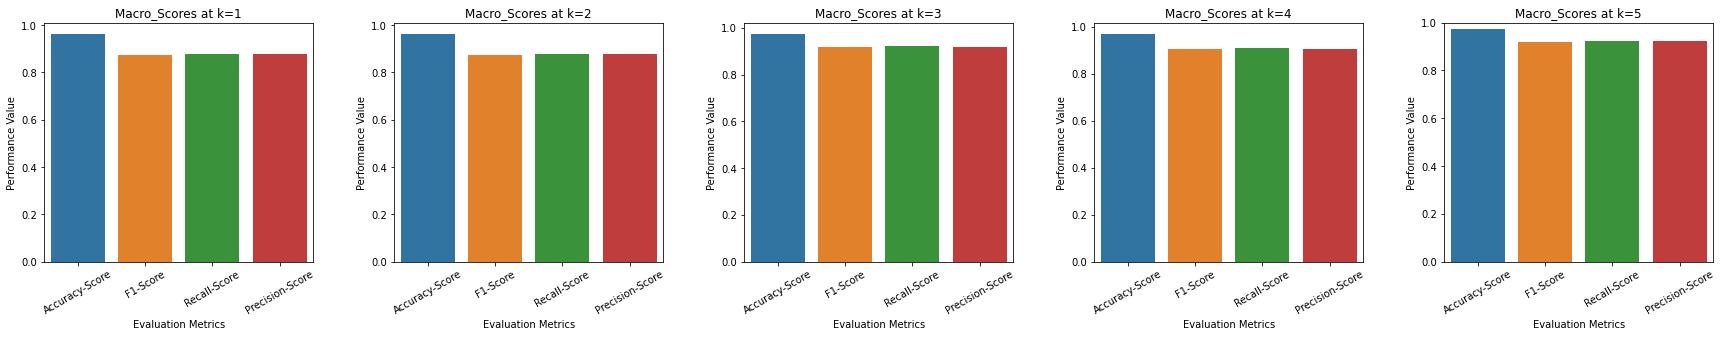

In [ ]:
barplots_micro_macro(k_scores,"Macro_Scores")

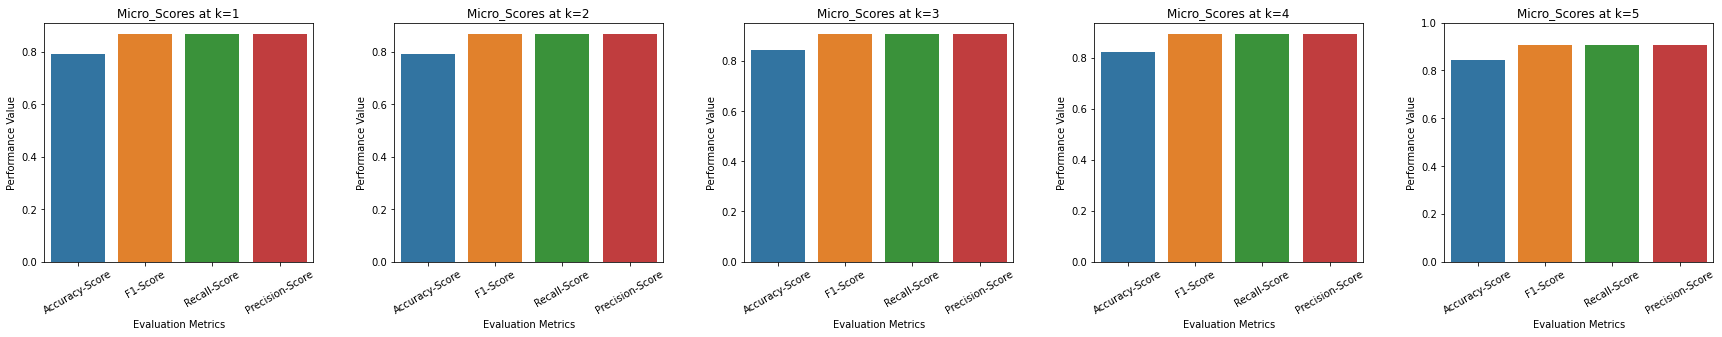

In [ ]:
barplots_micro_macro(k_scores,"Micro_Scores")

### **Line Plot**


Best Performing k is: 5 with Weighted F1 Value of: 0.9201616130323097




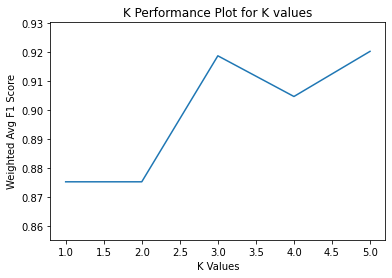

In [ ]:
best_k, best_value = lineplots(k_scores)

print('\nBest Performing k is: {} with Weighted F1 Value of: {}\n\n'.format(best_k,best_value))

### **Confusion Matrix for best K Value**

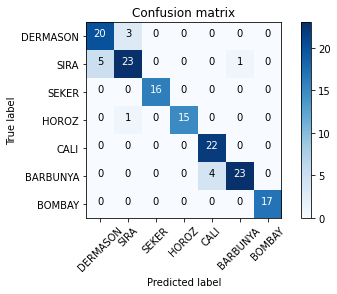

In [ ]:
cnf_matrix = confusion_matrix(list(y_test.values),k_performance[best_k],labels = list(encodings.values()))
plot_confusion_matrix(cnf_matrix,classes = list(encodings.keys()))

# **K-Means Algorithm**

## **K-Means Functions**

In [ ]:
# selecting k random centroids from dataset
def select_initial_centroids(k,K_Means_Data):
  initial_centroids =  [K_Means_Data.loc[random.randint(0,len(K_Means_Data)),:] for i in range(k)]
  initial_centroids = [list (initial_centroids[i].values) for i in range(len(initial_centroids))]
  return initial_centroids

# return dataset
def get_data():
  return data[data.columns.to_list()[0:-1]].copy()


# find closest centroids by distance
def find_closest_centroids(data,centroids):
  # no of data points
  r = data.shape[0] 

  # no of centroids
  n_centroids = len(centroids)

  # array to assign the centriod
  idx = np.zeros(r)

  for i in range(r):
    shortest_distance = math.inf
    for j in range(n_centroids):
      distance = np.linalg.norm(data[i] - centroids[j])
      if (shortest_distance > distance):
        idx[i] = j
        shortest_distance = distance 
  return idx


# Update Centroids
def compute_centroids(data, idx, n_centroids):
    # no of data points
    r,c = data.shape

    centroids = np.zeros((n_centroids, c))  

    temp = data.copy()
    temp['cluster']=idx

    for centroid in np.unique(idx):
      new_df = temp[temp['cluster']==centroid]
      new_df = new_df[new_df.columns.to_list()[0:-1]]

      j = 0
      for col in new_df.columns.to_list():
        centroids[int(centroid)][j] = sum(new_df[col])/len(new_df[col])
        j = j + 1
    return centroids        


# run K-Means
def run_k_means(K_Means_Data,initial_centroids):

  # dimensions of the data
  r,c = K_Means_Data.shape

  # shape of the centroids
  n_centroids = len(initial_centroids)

  # data-cluster positions
  idx = np.zeros(r)

  temp_centroids = None

  centroids = initial_centroids

  while (True):
    # find closest centroid
    idx = find_closest_centroids(K_Means_Data.values, centroids)
    #update centroids
    centroids = compute_centroids(K_Means_Data, idx, n_centroids)

    if (temp_centroids is not None):
      comparison = temp_centroids == centroids
      equal_arrays = comparison.all()
      if (equal_arrays):
        break
    temp_centroids = deepcopy(centroids) 

  return idx, centroids

## **Run K-Means**

In [ ]:
k_values = [2,3,4,5,6]
k_means_data = dict ()

for k in k_values:
  k_means_data[k] = dict ()
  K_Means_Data = get_data()
  initial_centroids = select_initial_centroids(k,K_Means_Data)
  idx, centroids = run_k_means(K_Means_Data,initial_centroids)
  k_means_data[k]['idx'] = idx
  k_means_data[k]['centroids'] = centroids

## **Plotting Functions**


### **Scatter Plots**

In [ ]:
def plot_k_means_clusters(k_means_data):

  count = 1
  num_cols = len(k_means_data)
  plt.subplots(nrows=1,ncols=num_cols,figsize=(25, 5))
  plt.tight_layout(pad=5)

  for k, info in k_means_data.items():
    plt.subplot(1,num_cols,count)
    temp_data = K_Means_Data.copy()
    title = 'Performance at k={}'.format(k)
    temp_data['cluster'] = info['idx']
    for cluster in np.unique(info['idx']):
      colors = ['b','g','r','c','m',]
      k_Meancluster = temp_data[temp_data['cluster'] == int(cluster)]	
      col = random.choice(colors)
      colors.remove(col)
      label = 'Cluster {}'.format(int(cluster))
      ax = sns.scatterplot(x=k_Meancluster.loc[:,'MinorAxisLength'],y=k_Meancluster.loc[:,'AspectRation'],label=label)        
      ax.set(title = title)
    count +=1 

  plt.show()

### **Line Plot**

In [ ]:
def lineplots_K_Means(dbi_scores):
  ax = sns.lineplot(x=dbi_scores.keys(),y=dbi_scores.values())
  ax.set(xlabel = 'K Values',ylabel = 'Davies Bouldin Index',title = 'K Performance Plot for K values')
  plt.ylim([min(dbi_scores.values())-0.1,max(dbi_scores.values())+0.1])

## **Evaluating K-Means**

### **Davies Bouldin Index**

In [ ]:
dbi_scores = dict ()

def euclidean_distance_DB(r1,r2):
  distance = 0
  for i in range(len(r1)):
    distance += pow((r1[i] - r2[i]),2) 
  return math.sqrt(distance)

def DaviesBouldin(X, labels):
    n_cluster = len(np.unique(labels))
    cluster_k = [X[labels == k] for k in range(n_cluster)]
    centroids = [np.mean(k, axis = 0) for k in cluster_k]
 
    S = [np.mean([euclidean_distance_DB(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
    Ri = []
 
    for i in range(n_cluster):
        Rij = []
        for j in range(n_cluster):
            if j != i:
                r = (S[i] + S[j]) / euclidean_distance_DB(centroids[i], centroids[j])
                Rij.append(r)
        Ri.append(max(Rij)) 
    dbi = np.mean(Ri)
 
    return dbi

## **Scores for each K**

In [ ]:
for k in k_values:
  dbi_scores[k] = DaviesBouldin(K_Means_Data.values,k_means_data[k]['idx'])
  print('Davies Bouldin Index when K = {} is : {}\n\n'.format(k,dbi_scores[k]))

Davies Bouldin Index when K = 2 is : 0.606566619857905


Davies Bouldin Index when K = 3 is : 0.820780804468749


Davies Bouldin Index when K = 4 is : 0.8571362810071599


Davies Bouldin Index when K = 5 is : 0.8933320561842522


Davies Bouldin Index when K = 6 is : 1.0572090404776893




## **Plotting K-Performances**

### **Scatter Plots**

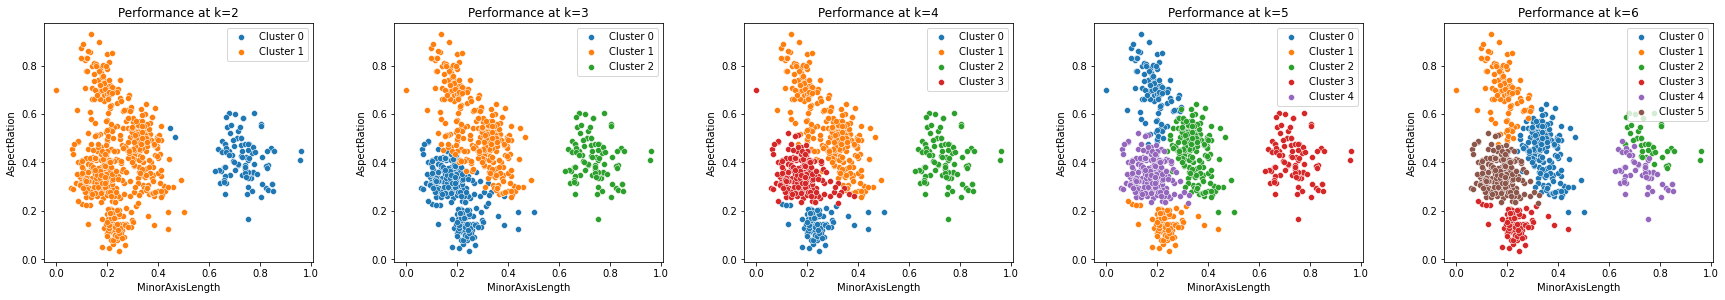

In [ ]:
plot_k_means_clusters(k_means_data)

### **Line Plot**

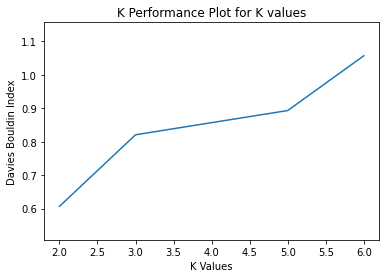

In [ ]:
lineplots_K_Means(dbi_scores)

### **Best K Value**

In [ ]:
best_k_value = min(dbi_scores, key=dbi_scores.get)
best_k_score = min(dbi_scores.values())
 
print('Best K Value is {} with Davies Bouldin Index: {}'.format(best_k_value,best_k_score))

Best K Value is 2 with Davies Bouldin Index: 0.606566619857905
